# Importing Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

### We can see that in this dataset, we do not have any missing values and every column that we have is float type.

In [11]:
# Let us firstly check the every type of column in the dataset
data = pd.read_csv("Advertising_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [16]:
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [12]:
# Making sure that we do not have any missing values
data.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [13]:
# Any duplicated rows?
data.duplicated().sum()

0

## Outliers

### Seems like we do have a bit outlier values at our target variable but I will keep them in order to protect the size of the data since we are working with a small number like 300 rows.

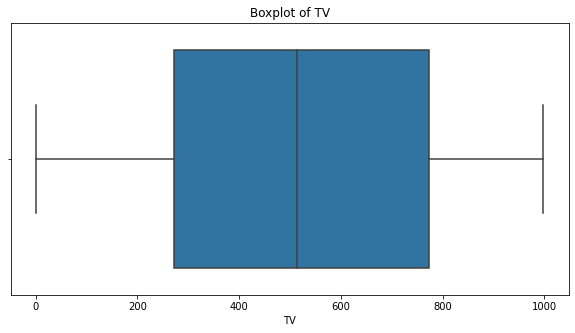

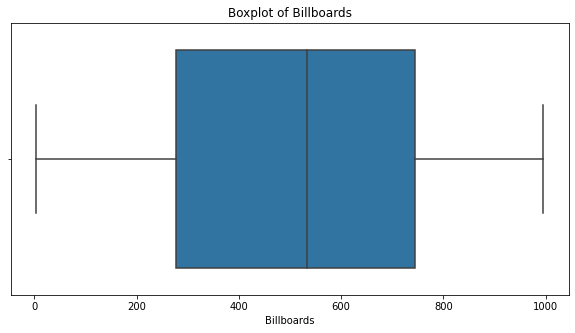

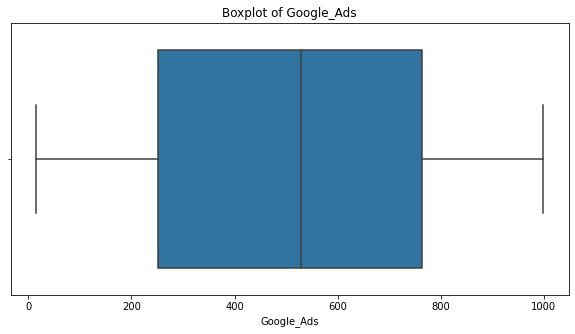

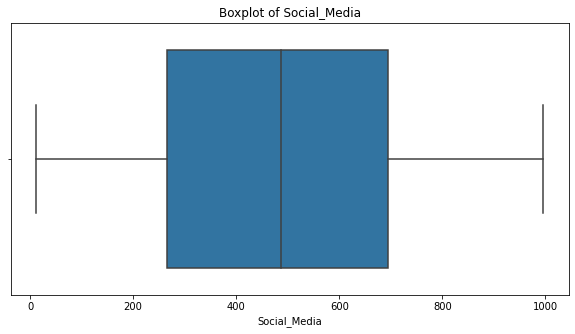

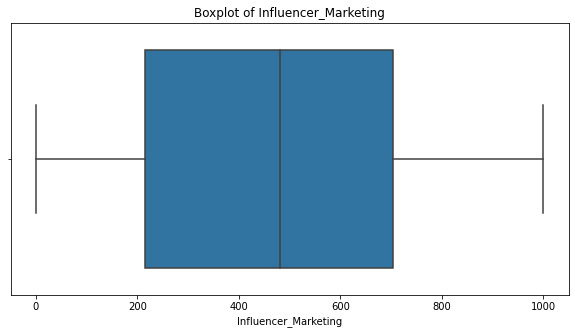

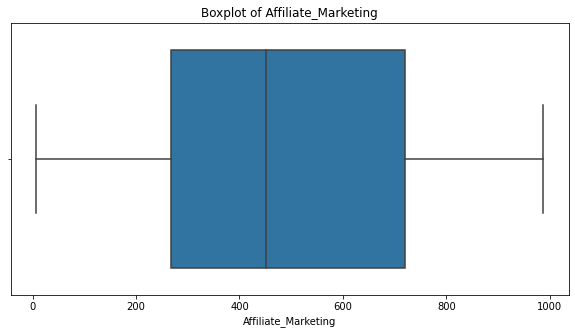

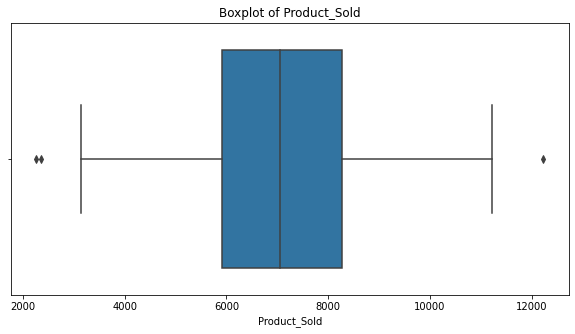

In [14]:
# Checking outliers
columns = data.columns.tolist()
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# Statistical Analysis

In [ ]:
# There is not much to see here. Mean values are similat to %50 percentile values. Observing smaller std values than mean values.
# The only thing that catches the eye is min values which are 1, 3, and 0 values for TV, Billboard, and Influencer columns respectively.
data.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


### We do have strong correlations when it comes to explaining Product_Sold column. The best one being Affiliate_Marketing and worst one being Influencer_Marketing.
### We don't have much information about what are these products that are selling but based on this data we can absolutely say that Influencer Marketing does not help with sales and this budget should be spent on other resources.

In [17]:
# Let's check the correlation of the columns
corr = data.corr()
corr["Product_Sold"].sort_values(ascending=False)

Product_Sold            1.000000
Affiliate_Marketing     0.611603
Billboards              0.480593
Social_Media            0.401088
TV                      0.374228
Google_Ads              0.203678
Influencer_Marketing    0.140844
Name: Product_Sold, dtype: float64

# EDA

In [18]:
def scatterplot(x, y, data):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(f'Scatter plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### We can kind of observe what we stated before in these graphs. Variables like Affiliate Marketing has high tilt that represents it's higher correlation compared to Influencer Marketing.

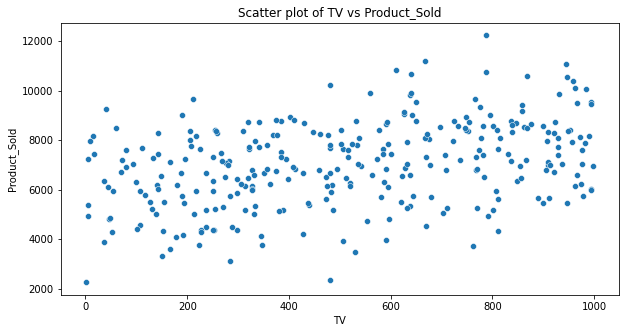

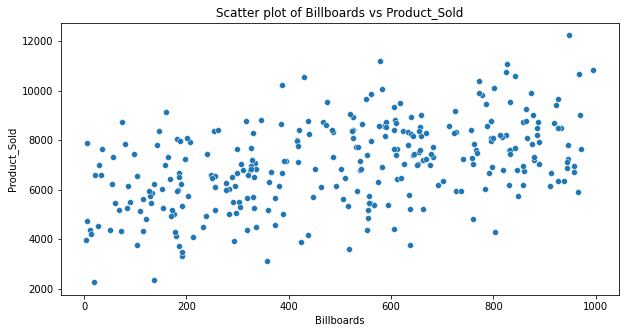

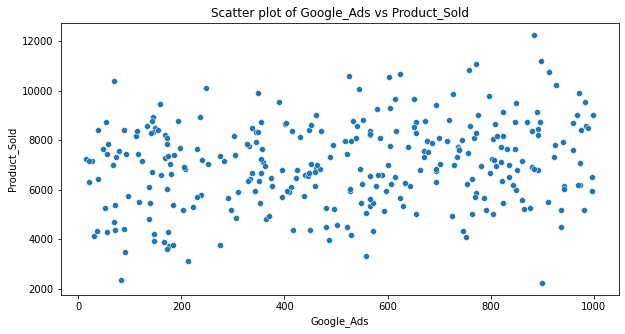

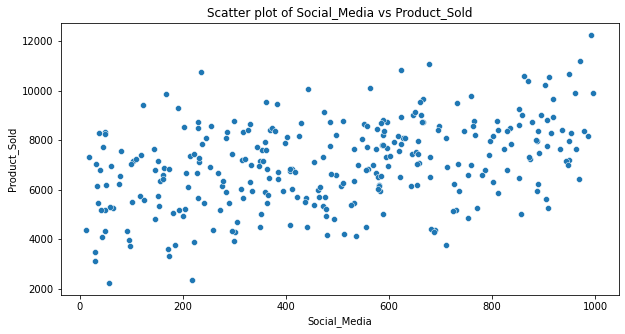

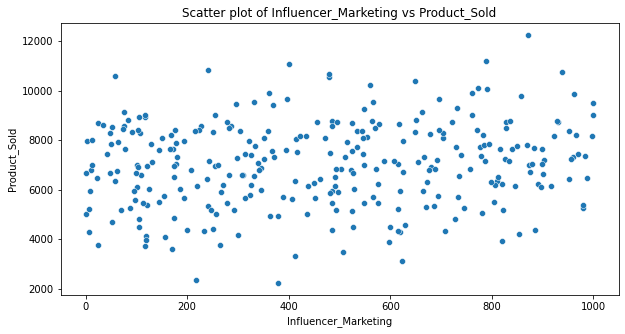

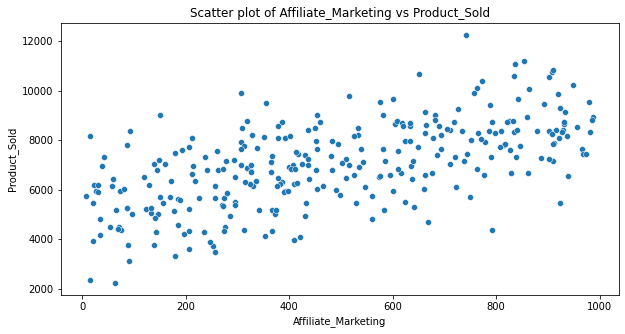

In [19]:
for column in columns:
    if column != "Product_Sold":
        scatterplot(column, "Product_Sold", data)

# Data Processing

In [20]:
# Splitting X and Y variables
X = data[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
y = data['Product_Sold']

In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Let's import MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Linear Regression with scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model_scaled.predict(X_train_scaled)
y_test_pred = model_scaled.predict(scaler.transform(X_test))

# Train metrics
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Test metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Train R^2: {r2_train:.4f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R^2: 1.0000
Train MSE: 113.05
Train RMSE: 10.63
Test R^2: 1.0000
Test MSE: 75.37
Test RMSE: 8.68


In [26]:
# Predicting on the test set
pred = model.predict(X_test)

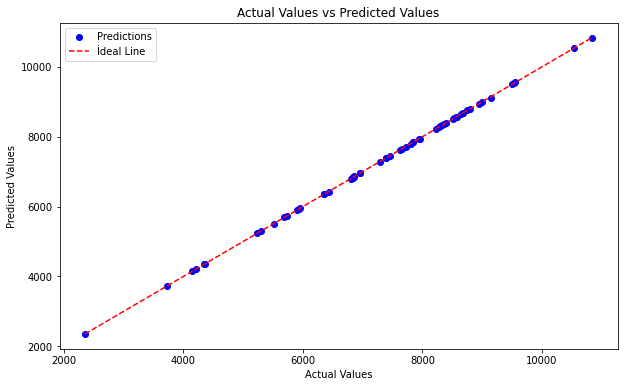

In [27]:
# Graph of Actual vs Predicted values
actual_values = y_test
predicted_values = pred

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Predictions')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', linestyle='--', label='İdeal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.legend()
plt.show()

# Conclusion

### We observed our models success metrics and it is safe to say that our model didn't overfit since our test metrics are better than train metrics.
### But this metrics are too successful to be actually true compared to real world data. This is hinting that this data is most likely is synthetic.
### We shouldn't expect that much of a perfect success rates while working with real world data.